# Visualización de datos en Pandas
La combinación de las librerías Pandas y Matplotlib permiten obtener gráficos a partir de los DataFrames. Aunque es posible utilzar los datos de un DataFrame como argumentos de las instrucciones para construír gráficos de Matplotlib, Pandas accede al Matplotlib API (esto es, a utilizar directamente las funciones gráficas de Matplotlib) de forma tal que puede utilizar sus propios métodos para generar los graficos resultantes.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')      # Modificamos el formato del estilo para obtener gráficos más atractivos. Default:('classic')

## Pandas plot
El método df.plot() permite gráficar un DataFrame en una figura con varias opciones:

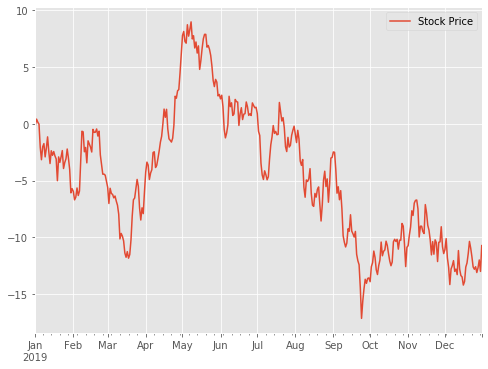

In [7]:
df = pd.DataFrame(data=np.random.randn(365), 
                 index=pd.date_range('2019/1/1', periods=365), 
                 columns=['Stock Price'])
df = df.cumsum()
df.plot(figsize=(8, 6))
plt.show()

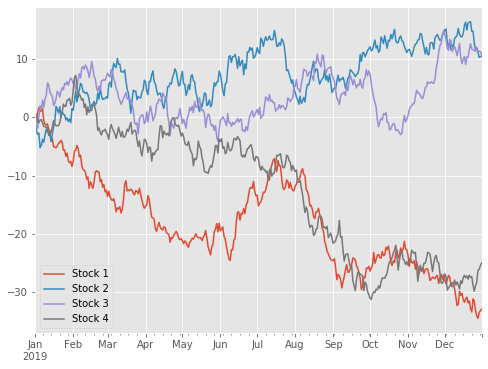

In [8]:
df = pd.DataFrame(data=np.random.randn(365, 4), 
                 index=pd.date_range('2019/1/1', periods=365), 
                 columns=['Stock 1', 'Stock 2', 'Stock 3', 'Stock 4'])
df = df.cumsum()
df.plot(figsize=(8, 6))
plt.show()

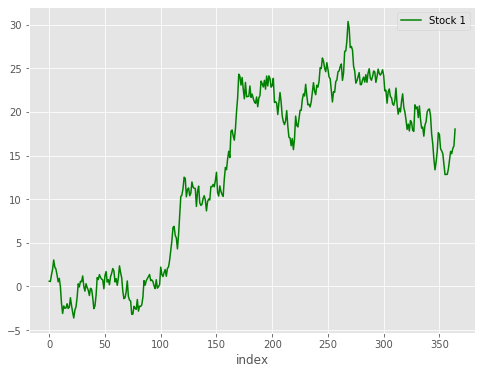

In [10]:
df = pd.DataFrame(data=np.random.randn(365, 2), 
                 columns=['Stock 1', 'Stock 2']).cumsum()
df['index'] = pd.Series(data=list(range(len(df))))
df.head()

df.plot(x='index', y='Stock 1', color='g', figsize=(8, 6))
plt.show()

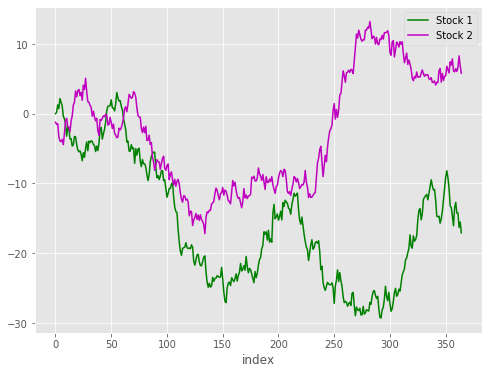

In [11]:
df = pd.DataFrame(data=np.random.randn(365, 2), 
                 columns=['Stock 1', 'Stock 2']).cumsum()
df['index'] = pd.Series(data=list(range(len(df))))
df.head()

df.plot(x='index', y=['Stock 1', 'Stock 2'], color=['g', 'm'], figsize=(8, 6))
plt.show()

## DatetimeIndex
En muchas oportunidades, las fechas son importadas hacia Pandas como textos. Estos se puede correguir convirtiendo estas fechas en indices tipo Datetime:

In [12]:
URL = "https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20190514&end=20200514"
df = pd.read_html(URL)[2]
df

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"May 14, 2020",9271.33,9793.27,9255.03,9733.72,56426907637,178881641547
1,"May 13, 2020",8805.39,9317.88,8805.39,9269.99,45558144023,170352710071
2,"May 12, 2020",8610.39,8949.90,8569.64,8804.48,42142717533,161791577301
3,"May 11, 2020",8755.54,9033.47,8374.32,8601.80,57119858802,158059235276
4,"May 10, 2020",9591.17,9595.58,8395.11,8756.43,63325279337,160884755211
...,...,...,...,...,...,...,...
362,"May 18, 2019",7341.66,7447.27,7251.50,7271.21,21354286562,128761727083
363,"May 17, 2019",7886.93,7929.15,7038.12,7343.90,30066644905,130034777633
364,"May 16, 2019",8194.50,8320.82,7729.61,7884.91,33167197581,139599559278
365,"May 15, 2019",7989.37,8216.42,7899.11,8205.17,28344112920,145254332460


In [13]:
df.index = pd.DatetimeIndex(df['Date'])
df.drop('Date', axis=1, inplace=True)
df.head()

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2020-05-14,9271.33,9793.27,9255.03,9733.72,56426907637,178881641547
2020-05-13,8805.39,9317.88,8805.39,9269.99,45558144023,170352710071
2020-05-12,8610.39,8949.90,8569.64,8804.48,42142717533,161791577301
2020-05-11,8755.54,9033.47,8374.32,8601.80,57119858802,158059235276
2020-05-10,9591.17,9595.58,8395.11,8756.43,63325279337,160884755211


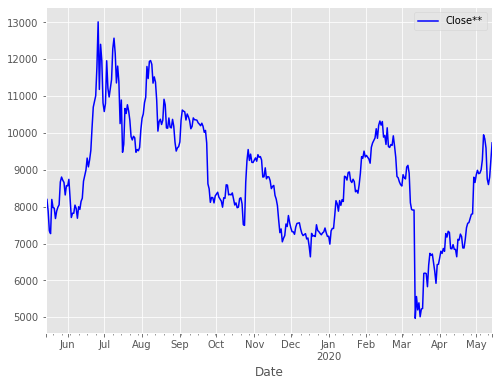

In [14]:
#df['Close**'].plot()
df.plot(y='Close**', color='b', figsize=(8, 6))
plt.show()

## Otros gráficos

Adicionalmente, se pueden obtener estos gráficos adicionales en Pandas:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist         
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

También se puede llamar a `df.plot(kind='hist')` o reemplazar el argunento `kind` con cualquier termino mostrado en la lista anterior e.g. 'box','barh', etc..)

   Data0  Data1  Data2  Data3
0     57     62     31     28
1     18     58     49     92
2     23     59     45     72
3     52     24     43     83
4     79     43     17     64
5     82     23     56     49
6     11     40     32     11
7     28     88     68     45
8     50     68     69     34
9     78     85     90     67


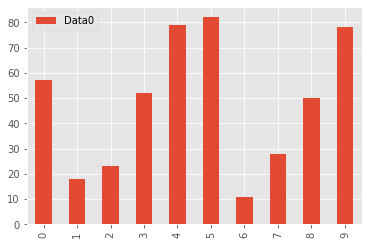

In [15]:
df = pd.DataFrame(data=np.random.randint(10, 100, (10, 4)))
df.rename(columns=lambda x: "Data" + str(x), inplace=True)
print(df)

df.plot.bar(y='Data0')
plt.show()

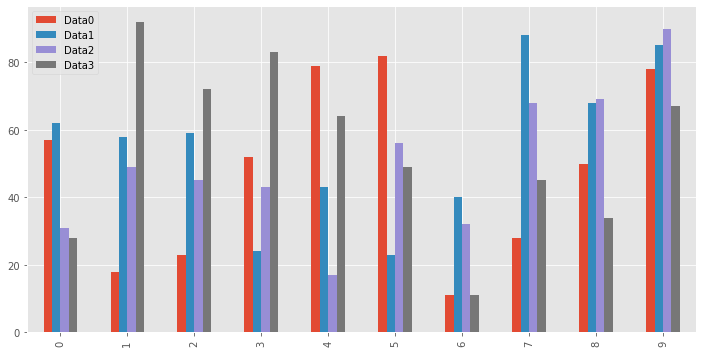

In [16]:
df.plot.bar(figsize=(12, 6))
plt.show()

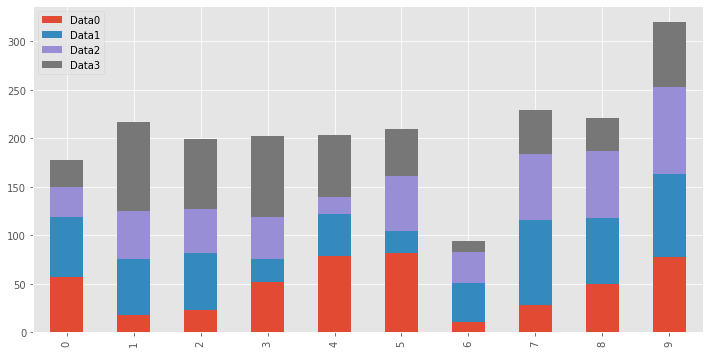

In [17]:
df.plot.bar(stacked=True, figsize=(12, 6))
plt.show()

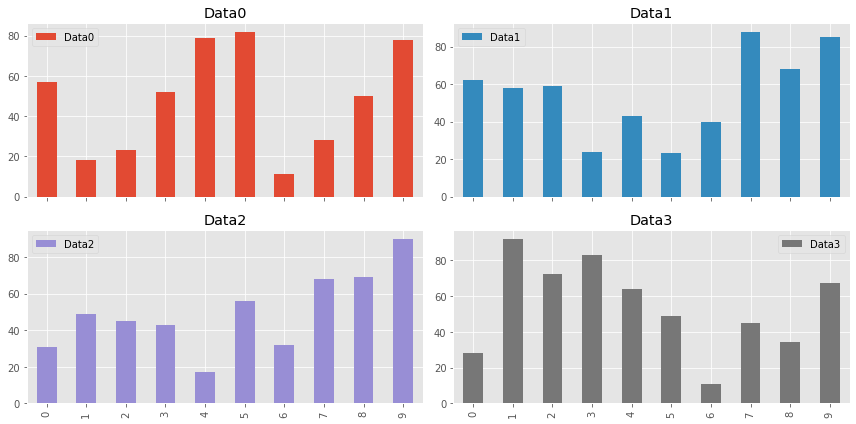

In [18]:
df.plot.bar(subplots=True, layout=(2, 2), figsize=(12, 6))
plt.tight_layout()
plt.show()

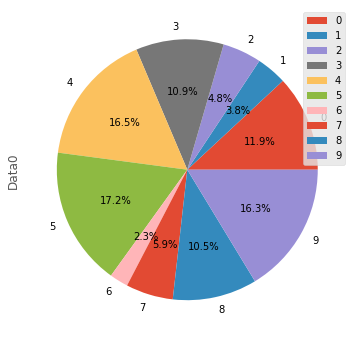

In [19]:
df.plot.pie(y='Data0', figsize=(12, 6), autopct="%.1f%%")
plt.show()

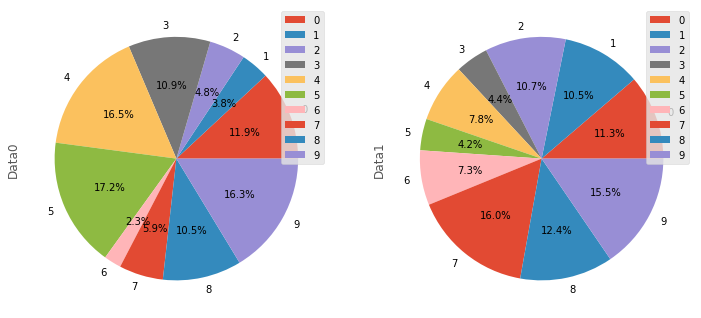

In [20]:
df[['Data0', 'Data1']].plot.pie(figsize=(12, 6), autopct="%.1f%%", subplots=True)
plt.show()

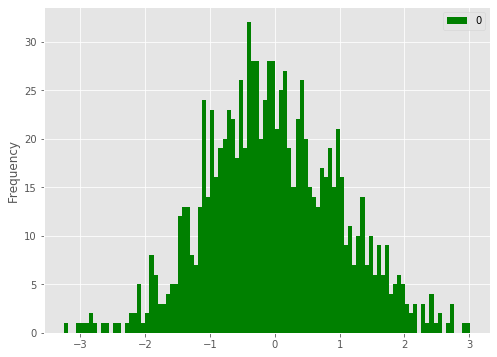

In [21]:
df = pd.DataFrame(data=np.random.randn(1000, 3))
df.plot.hist(y=0, bins=100, color='g', figsize=(8, 6))
plt.show()

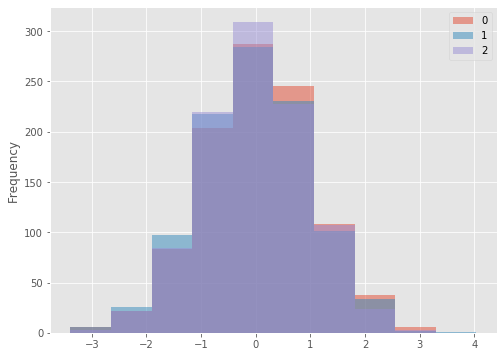

In [22]:
df = pd.DataFrame(data=np.random.randn(1000, 3))
df.plot.hist(alpha=0.5, figsize=(8, 6))

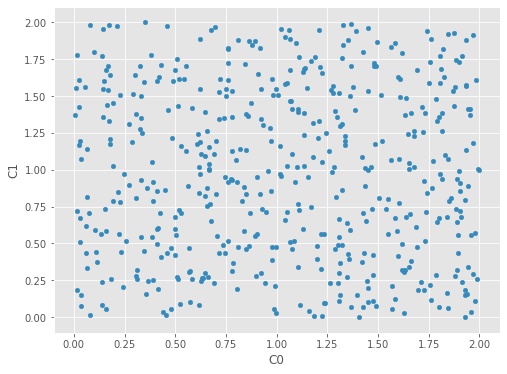

In [23]:
df = pd.DataFrame(data=np.random.uniform(0, 2, (500, 3)),
                 columns=['C0', 'C1', 'C2'])
df.plot.scatter(x='C0', y='C1', figsize=(8, 6))
plt.show()

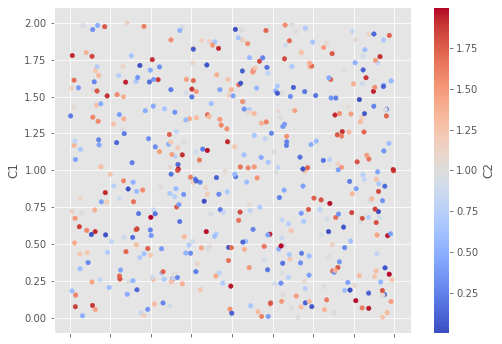

In [24]:
df.plot.scatter(x='C0', y='C1', c='C2', cmap='coolwarm', figsize=(8, 6))
plt.show()

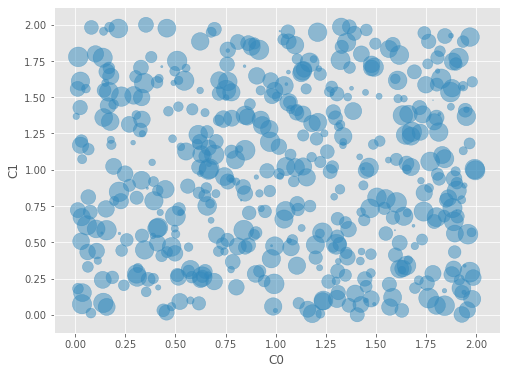

In [25]:
df.plot.scatter(x='C0', y='C1', s=df['C2']*200, alpha=0.5, figsize=(8, 6))   # s debe ser entero
plt.show()